Se utiliza la libreria de deep-textblob porque la googletrans no estaba funcionando para hacer la traducción

In [1]:
#Analisis de Sentimientos en dataset de comentarios

In [2]:
# Instalar librería necesaria
%pip install deep-translator textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# !pip install googletrans==3.1.0a0

In [4]:
#Importo Librerias
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from deep_translator import GoogleTranslator


In [5]:
# Funciones para traducir

def translateComment(strComment: str):
    try:
        translator = GoogleTranslator(source='es', target='en')
        strEngComment = translator.translate(strComment)
        return strEngComment
    except Exception as e:
        print(f"Translation error: {e}")
        return strComment

def getPolarity(strComment):
    try:
        strComment = translateComment(strComment)  # Translate to English
        analysis = TextBlob(strComment)  # Analyze sentiment
        return analysis.sentiment.polarity  # Return polarity
    except Exception as e:
        print(f"Polarity analysis error: {e}")
        return 0  # Return neutral polarity if analysis fails


In [6]:
#Cargo el archivo de comentarios
df = pd.read_csv('C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/Comentarios.csv')

In [7]:
# Aplicamos la función getPolarity a la columna de comentarios
df['polaridad'] = df['Comentario'].apply(getPolarity)

In [8]:
print(df)

                                           Comentario  polaridad
0   La comida fue excelente y el servicio fue exce...   0.555556
1   El ambiente era agradable y la comida estaba d...   0.515278
2   La comida estaba bien, pero el servicio fue le...   0.200000
3   No me gustó la comida, estaba fría y el sabor ...  -0.475000
4   El peor restaurante en el que he estado. No lo...  -1.000000
..                                                ...        ...
66  Siempre disfruto venir aquí. La comida es deli...   0.629167
67  Buen lugar para cenar, aunque el servicio pued...   0.150000
68  La comida está bien, pero el ambiente no es mu...   0.067308
69  No me gustó la comida y el servicio fue muy de...  -0.520000
70  Terrible experiencia. No recomendaría este lug...  -1.000000

[71 rows x 2 columns]


In [9]:
df.shape

(71, 2)

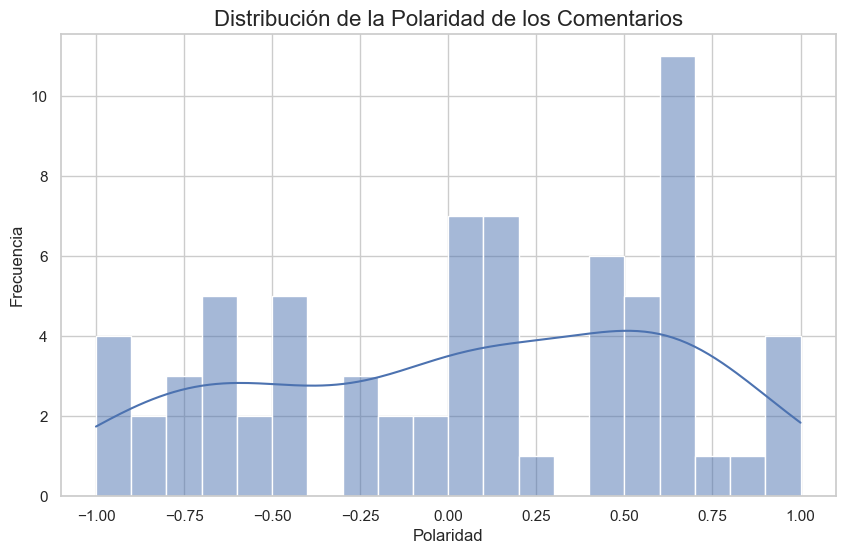

In [10]:
sns.set(style="whitegrid") #estilo

# Crear un histograma para la distribución de la polaridad
plt.figure(figsize=(10,6))
sns.histplot(df['polaridad'], bins=20, kde=True)

# Añadir títulos y etiquetas
plt.title('Distribución de la Polaridad de los Comentarios', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

Los valores cerca a -1 son comentarios negativos, los valores cerca a 1 son comentarios positivos y en el valor cero es neutral
Con esta distribución vemos que los comentarios estan divididos entre los 3 items: negativo, neutral y negativos

Si defino que los parametros de comentarios
- negativos van de -1 a -0.5
- positivos 0.5 a 1
- neutral la diferencia entre positivo y negativo (-0,5 y 0,5)


In [11]:
# Se sajusta codigo para mostrar la cantidad por cada caso
negativos = df[df['polaridad'] < -0.5].shape[0]
neutros = df[(df['polaridad'] >= -0.5) & (df['polaridad'] <= 0.5)].shape[0]
positivos = df[df['polaridad'] > 0.5].shape[0]

print(f"Comentarios negativos: {negativos}")
print(f"Comentarios neutros: {neutros}")
print(f"Comentarios positivos: {positivos}")

Comentarios negativos: 16
Comentarios neutros: 33
Comentarios positivos: 22


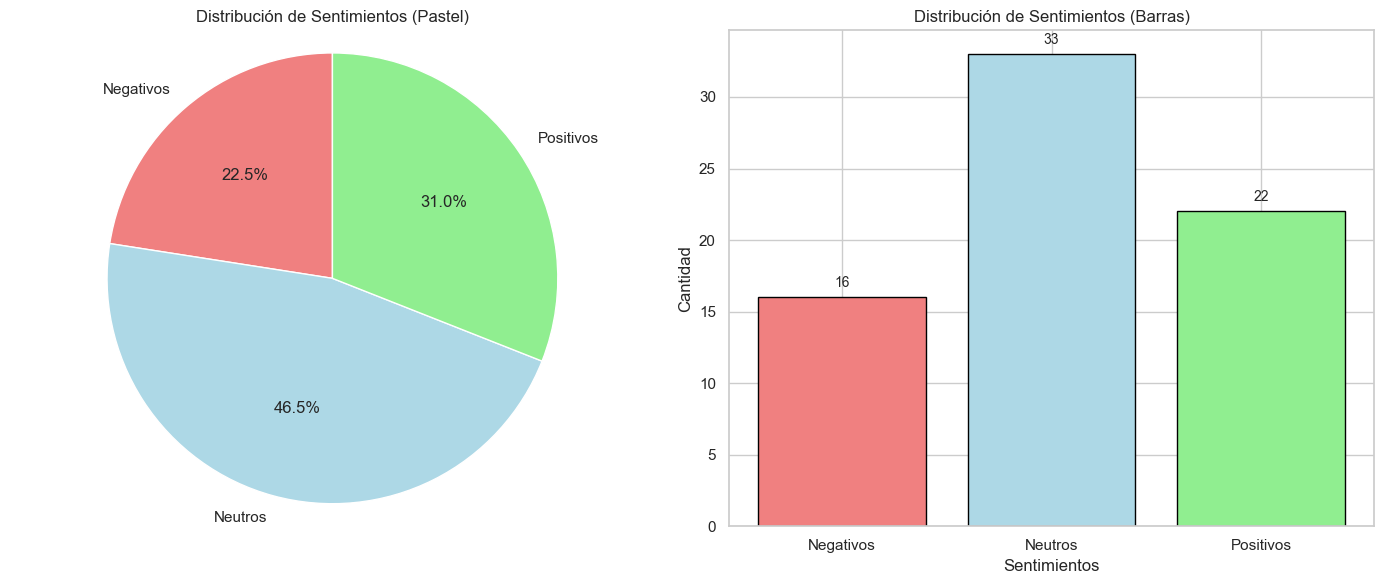

In [12]:
import matplotlib.pyplot as plt

# Calcular los valores
negativos = df[df['polaridad'] < -0.5].shape[0]
neutros = df[(df['polaridad'] >= -0.5) & (df['polaridad'] <= 0.5)].shape[0]
positivos = df[df['polaridad'] > 0.5].shape[0]

# Datos para el gráfico
etiquetas = ['Negativos', 'Neutros', 'Positivos']
tamaños = [negativos, neutros, positivos]
colores = ['lightcoral', 'lightblue', 'lightgreen']  # Tonos pastel

# Crear gráficos
plt.figure(figsize=(14, 6))

# Gráfico de pastel
plt.subplot(1, 2, 1)
plt.pie(
    tamaños, labels=etiquetas, colors=colores, 
    autopct='%1.1f%%', startangle=90
)
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.title('Distribución de Sentimientos (Pastel)')

# Gráfico de barras
plt.subplot(1, 2, 2)
barras = plt.bar(etiquetas, tamaños, color=colores, edgecolor='black')
plt.title('Distribución de Sentimientos (Barras)')
plt.ylabel('Cantidad')
plt.xlabel('Sentimientos')

# Agregar valores encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2, altura + 0.5,  # Posición del texto
        f'{int(altura)}', ha='center', va='bottom', fontsize=10
    )

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [13]:
# Definir las categorías de comentarios según la polaridad
negative_comments = df[df['polaridad']< -0.5]
positive_comments = df[df['polaridad'] > 0.5]
neutral_comments = df[(df['polaridad'] >= -0.5) & (df['polaridad'] <= 0.5)]


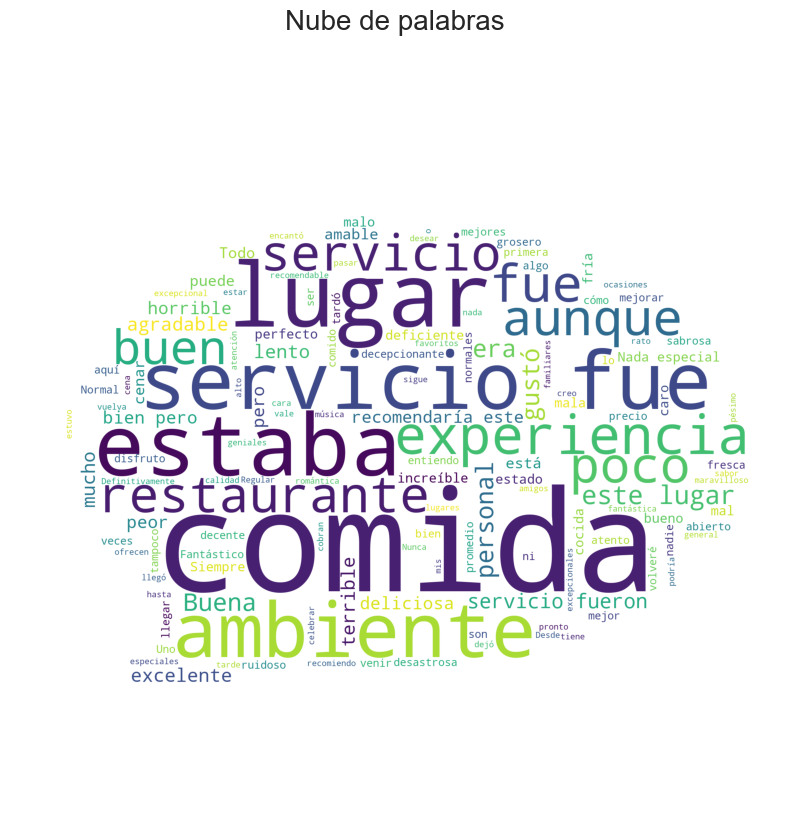

<Figure size 800x600 with 0 Axes>

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

background = np.array(Image.open('comment.png'))
plt.rcParams['figure.figsize'] = (10, 10)

# Concatenar todos los comentarios en un solo string
all_comments = " ".join(comment for comment in df['Comentario'])

# Configurar stopwords adicionales
stopwords = set(STOPWORDS)
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generar la nube de palabras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords,
    max_words=200,  # Número máximo de palabras
    contour_width=0,  # Sin borde
    prefer_horizontal=0.8,  # Prefiere más palabras horizontales
    random_state=42,  # Asegura reproducibilidad
    mask=background
).generate(all_comments)

# Mostrar la nube de palabras
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Nube de palabras", fontsize=20, pad=20)
plt.subplots(figsize=(8,6))
plt.clf()
plt.show()

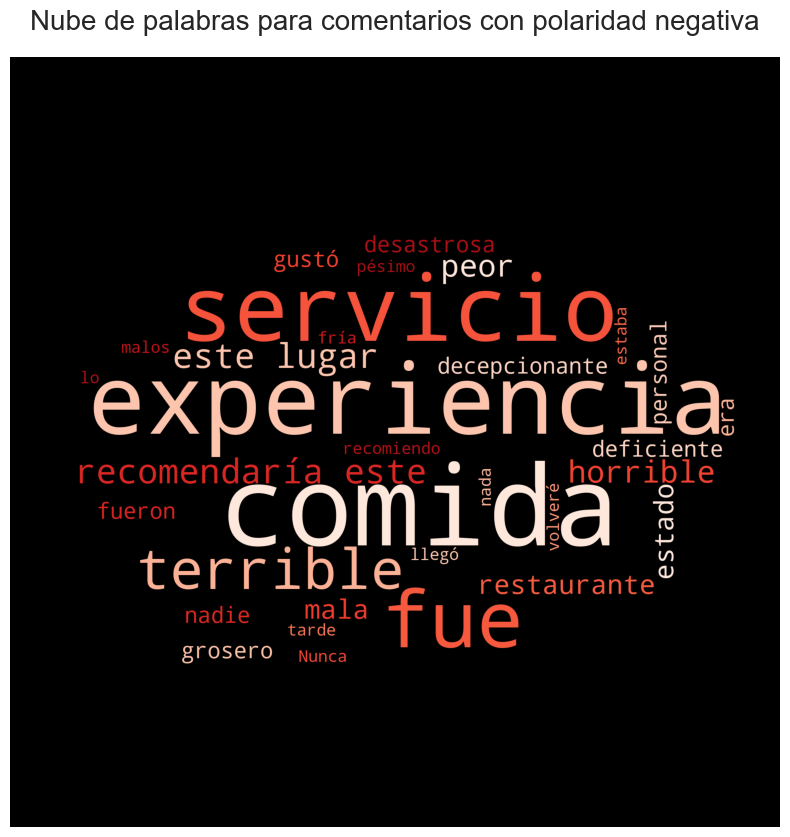

<Figure size 800x600 with 0 Axes>

In [16]:
# Concatenar todos los comentarios negativos en un solo string
all_negative_comments = " ".join(comment for comment in negative_comments['Comentario'])

# Crear un conjunto de stopwords personalizado
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generar la nube de palabras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    stopwords=stopwords,
    max_words=200,  # Número máximo de palabras
    contour_width=0,  # Sin borde
    colormap='Reds',
    prefer_horizontal=0.8,  # Prefiere más palabras horizontales
    random_state=42,  # Asegura reproducibilidad
    mask=background
).generate(all_negative_comments)

# Mostrar la nube de palabras
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Nube de palabras para comentarios con polaridad negativa", fontsize=20, pad=20)
plt.subplots(figsize=(8,6))
plt.clf()
plt.show()

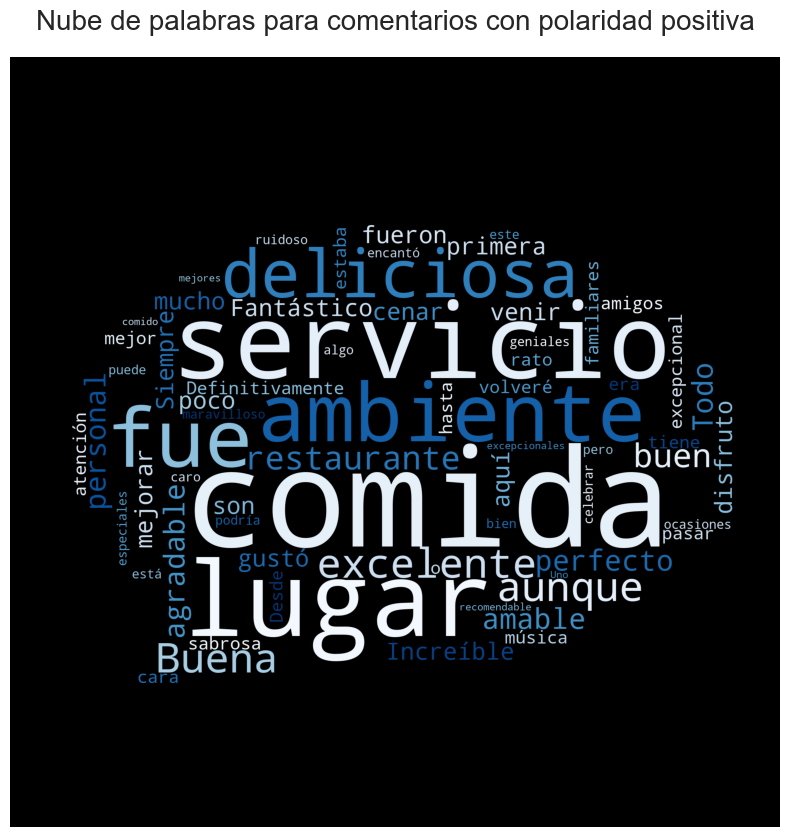

<Figure size 800x600 with 0 Axes>

In [17]:
# Concatenar todos los comentarios negativos en un solo string
all_positive_comments = " ".join(comment for comment in positive_comments['Comentario'])

# Crear un conjunto de stopwords personalizado
stopwords = set(STOPWORDS).union({"el", "la", "los", "las", "de", "y", "a", "que", "en", "por", "con", "es", "un", "una", "para", "muy"})

# Generar la nube de palabras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    stopwords=stopwords,
    max_words=200,  # Número máximo de palabras
    contour_width=0,  # Sin borde
    colormap='Blues',
    prefer_horizontal=0.8,  # Prefiere más palabras horizontales
    random_state=42,  # Asegura reproducibilidad
    mask=background
).generate(all_positive_comments)

# Mostrar la nube de palabras
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Nube de palabras para comentarios con polaridad positiva", fontsize=20, pad=20)
plt.subplots(figsize=(8,6))
plt.clf()
plt.show()